# 4. Single-layer Neural Network with Pattern images based on Lengyel-Epstein model
- X : imges, Z = W * gradient(X) + b
- optimizer : Gradient Descent

## 1) Import Packages

In [1]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math
import sklearn.metrics as metrics

## 2) Make Dataset

In [72]:
# Make dataset(144)
x_orig = []
y_orig = np.zeros((1,48))
for i in range(1,145):
    if i <= 48 :
        folder = 0
    elif i <=96 :
        folder = 1
    else:
        folder = 2

    img = Image.open('144/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 48),i), axis = 1)

In [ ]:
# Make dataset(360)
x_orig = []
y_orig = np.zeros((1,120))
for i in range(1,361):
    if i <= 120 :
        folder = 0
    elif i <=240 :
        folder = 1
    else:
        folder = 2

    img = Image.open('360/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 120),i), axis = 1)

In [89]:
# Make dataset(720)
x_orig = []
y_orig = np.zeros((1,240))
for i in range(1,721):
    if i <= 240 :
        folder = 0
    elif i <=480 :
        folder = 1
    else:
        folder = 2

    img = Image.open('720/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 240),i), axis = 1)

In [106]:
x_orig = np.array(x_orig)
print(x_orig.shape)
print(y_orig.shape)  

(1440, 64, 64)
(1, 1440)


In [107]:
# Random shuffle
s = np.arange(x_orig.shape[0])
np.random.shuffle(s)

x_shuffle = x_orig[s,:]
y_shuffle = y_orig[:,s]

print(x_shuffle.shape)
print(y_shuffle.shape)
# y_shuffle

(1440, 64, 64)
(1, 1440)


In [108]:
# Split train and test datasets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_shuffle,y_shuffle.T, 
                                                                        test_size=0.3,  shuffle=True, random_state=1004)

In [109]:
print(x_train_orig.shape)
print (y_train_orig.shape)

(1008, 64, 64)
(1008, 1)


In [110]:
# Flatten the training and test images
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Normalize image vectors
x_train = x_train_flatten/255.
x_test = x_test_flatten/255.

# Convert training and test labels to one hot matrices
enc = OneHotEncoder()
y1 = y_train_orig.reshape(-1,1)
enc.fit(y1)
y_train = enc.transform(y1).toarray()
y_train = y_train.T

y2 = y_test_orig.reshape(-1,1)
enc.fit(y2)
y_test = enc.transform(y2).toarray()
y_test = y_test.T

# Explore dataset 
print ("number of training examples = " + str(x_train.shape[1]))
print ("number of test examples = " + str(x_test.shape[1]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1008
number of test examples = 432
x_train shape: (4096, 1008)
y_train shape: (3, 1008)
x_test shape: (4096, 432)
y_test shape: (3, 432)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

## 3) Define required functions

In [111]:
def initialize_parameters(nx, ny):
    """
    Argument:
        nx -- size of the input layer (4096)
        ny -- size of the output layer (3)
    
    Returns:
        W -- weight matrix of shape (ny, nx)
        b -- bias vector of shape (ny, 1)

    """   
    np.random.seed(1)

    W = np.random.randn(ny,nx)*0.01
    b = np.zeros((ny,1))

    assert(W.shape == (ny, nx))
    assert(b.shape == (ny, 1))

    
    return W, b  

In [112]:
def softmax(Z):
    # compute the softmax activation
    
    S = np.exp(Z + np.max(Z)) / np.sum(np.exp(Z + np.max(Z)), axis = 0)
    
    return S

In [113]:
def classlabel(Z):
    # probabilities back into class labels
    y_hat = Z.argmax(axis=0)
    
    return y_hat

In [114]:
def gradient_vec(X):
    g_X_r = np.gradient(X, axis = 1)
    g_X_c = np.gradient(X, axis = 0)
    g_X = g_X_r**2 + g_X_c**2
    return g_X

In [115]:
def propagate(W, b, X, Y):

    m = X.shape[1]
#     n = Y.shape[0]
    
    # Forward Propagation
    Z = np.dot(W, gradient_vec(X))+ b
    A = softmax(Z)     # compute activation
    
    cost = (-1/m) * np.sum(Y * np.log(A)) # compute cost (Cross_entropy)
    
    # Backward propagation
    dW = (1/m) * (np.dot(gradient_vec(X),(A-Y).T)).T
    db = (1/m) * (np.sum(A-Y))

#     assert(dW.shape == W.shape)
#     assert(db.dtype == float)
#     cost = np.squeeze(cost)
#     assert(cost.shape == (Y.shape[0],1))
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

## 4) Single-Gradient Layer Neural Network with Gradient Descent

In [116]:
def optimize(X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    W, b = initialize_parameters(4096,3)
    for i in range(num_iterations):

        grads, cost = propagate(W,b,X,Y)

        dW = grads["dW"]
        db = grads["db"]
        
        W = W - (learning_rate) * dW
        b = b - (learning_rate) * db

        # Record the costs for plotting
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 200)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Lets save the trainded parameters in a variable
    params = {"W": W,
              "b": b}    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

Cost after iteration 0: 1.098714
Cost after iteration 200: 0.732172
Cost after iteration 400: 0.602438
Cost after iteration 600: 0.528716
Cost after iteration 800: 0.476622
Cost after iteration 1000: 0.436599
Cost after iteration 1200: 0.404258
Cost after iteration 1400: 0.377234
Cost after iteration 1600: 0.354110
Cost after iteration 1800: 0.333972


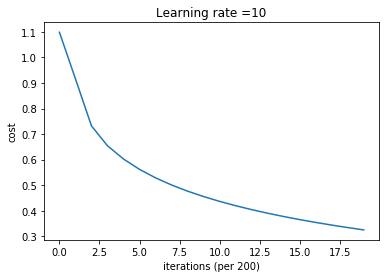

W = [[ 0.75666038  1.4295072   0.90171252 ...  1.93655796  2.06743493
   2.22708404]
 [-2.18821859 -2.09562011 -0.72100067 ... -1.80506523 -1.2023475
  -0.7789559 ]
 [ 1.4303779   0.70370857 -0.17823625 ... -0.15769104 -0.8602768
  -1.4253642 ]]
b = [[1.72701359e-15]
 [1.72701359e-15]
 [1.72701359e-15]]


In [117]:
params, grads, costs = optimize(x_train, y_train, num_iterations= 2000, learning_rate = 10, print_cost = True)

print ("W = " + str(params["W"]))
print ("b = " + str(params["b"]))

## 5) Accuracy Analysis

In [120]:
def predict(W, b, X) :
    '''
    Predict the label(0,1,2) using argmax
    
    Arguments:
    X : data of size (num_px * num_px, number of examples)
    
    Returns:
    y_prediction : predictions (0/1/2) for the examples(my_image)
    '''
    
    m = X.shape[1]
    
    # Compute "A" predicting the probabilities
    Z = np.dot(W, gradient_vec(X))+ b
    A = softmax(Z) 

    # Convert probabilities A to actual predictions
    y_prediction = A.argmax(axis=0)
    
#     assert(y_prediction.shape == (1, m))
    
    return y_prediction

In [121]:
# Predict test/train set
W1 = params['W']
b1 = params['b']
y_prediction_train = predict(W1, b1, x_train)
y_prediction_test = predict(W1, b1, x_test)
print(y_prediction_train)
print(y_prediction_test)
# Print train/test Errors
print("train accuracy : ", metrics.accuracy_score(y_prediction_train, y_train_orig))
print("test accuracy : ", metrics.accuracy_score(y_prediction_test, y_test_orig))

[2 1 2 ... 0 2 1]
[0 0 0 2 0 2 0 1 1 1 0 1 1 2 1 1 2 0 2 0 2 2 2 2 2 1 1 1 0 1 0 0 2 1 2 2 1
 1 0 2 1 2 1 0 0 1 0 1 1 1 1 1 2 2 2 1 2 0 2 0 2 1 2 2 0 0 2 2 2 1 1 0 1 0
 2 2 0 2 2 1 0 2 2 0 2 0 2 0 0 0 2 1 1 2 2 0 0 1 1 1 0 1 2 2 2 1 2 2 2 2 0
 1 0 1 2 1 1 2 1 0 1 2 1 2 2 0 1 0 1 0 1 2 2 0 2 0 1 2 1 0 1 1 2 1 0 0 1 2
 0 0 1 0 0 0 0 0 1 0 0 2 1 0 1 0 2 1 2 0 1 0 2 1 0 0 0 0 2 2 2 0 0 2 2 2 0
 1 0 0 1 0 0 2 2 1 0 2 0 1 0 1 1 0 0 1 2 2 1 2 1 0 2 2 2 1 2 1 0 2 1 0 1 0
 1 0 1 0 1 0 1 0 2 0 2 2 0 1 2 0 2 2 2 0 0 2 1 2 0 0 0 0 0 2 0 1 1 0 0 2 0
 1 0 1 0 0 0 2 0 0 1 0 2 0 2 1 2 2 1 2 1 1 0 2 1 1 0 1 1 0 0 0 2 2 2 1 1 1
 1 2 0 2 1 2 0 1 0 0 1 0 1 0 2 0 2 0 0 1 0 1 0 1 2 1 0 1 2 2 1 1 1 2 1 2 2
 2 1 0 1 1 1 1 1 1 0 2 1 1 2 0 1 0 2 0 1 0 2 1 1 1 2 0 1 0 1 1 0 2 2 0 1 0
 1 1 0 0 1 0 2 1 1 1 0 1 0 1 2 0 2 1 0 2 2 1 1 1 2 0 2 1 0 0 0 1 2 0 2 0 2
 1 1 1 0 0 0 2 2 2 2 0 2 1 0 2 0 1 0 1 2 0 1 1 1 1]
train accuracy :  0.9553571428571429
test accuracy :  0.3425925925925926
